# El tratamiento de las variables categóricas

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("../datasets/ecom-expense/Ecom Expense.csv")

In [3]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [4]:
dummy_gender = pd.get_dummies(df["Gender"], prefix = "Gender")
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix = "City")

In [6]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [7]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [9]:
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [11]:
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [12]:
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [45]:
feature_cols = ["Monthly Income", "Transaction Time", "Gender_Male", "Gender_Female", "City_Tier 1", "City_Tier 2"
               , "City_Tier 3", "Record"]

In [46]:
X = df_new[feature_cols]
Y = df_new["Total Spend"]

In [47]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
print(lm.intercept_)
print(lm.coef_)

-79.41713030136907
[ 1.47538980e-01  1.54946125e-01  1.31025013e+02 -1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [49]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205738),
 ('Transaction Time', 0.1549461254958957),
 ('Gender_Male', 131.02501325554584),
 ('Gender_Female', -131.02501325554599),
 ('City_Tier 1', 76.7643260104953),
 ('City_Tier 2', 55.13897430923233),
 ('City_Tier 3', -131.9033003197277),
 ('Record', 772.2334457445639)]

In [50]:
lm.score(X,Y)

0.9179923586131016

El modelo puede ser escrito como:
* $TotalSpend = -79.41713030136907+'Monthly Income'*0.14753898049205738+'Transaction Time'* 0.1549461254958957+
    'Gender Male'*131.02501325554584+'Gender Female'*-131.02501325554599+'City Tier 1'*76.7643260104953+
    'City Tier 2'*55.13897430923233+'City_Tier 3'*-131.9033003197277+'Record'*772.2334457445639$
    
    * Si es hombre y vive en CT1: $TotalSpend = -79.41713030136907+'Monthly Income'*0.14753898049205738+'Transaction Time'* 0.1549461254958957+131.02501325554584+76.7643260104953+'Record'*772.2334457445639$
    * Si es hombre y vive en CT2: $Total_Spend = 106.74685726340445 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 +'Record'* 772.2334457445648$
    * Si es hombre y vive en CT3: $Total_Spend = -80.29541736555583 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545+'Record'* 772.2334457445648$
    * Si es mujer y vive en CT1: $Total_Spend = -79.41713030137362 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 - 131.0250132555456+ 76.76432601049527 +'Record'* 772.2334457445648$
    * Si es mujer y vive en CT2: $Total_Spend = -79.41713030137362 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 - 131.0250132555456+ 55.138974309232474  +'Record'* 772.2334457445648$
    * Si es mujer y vive en CT3: $Total_Spend = -79.41713030137362 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 - 131.0250132555456-131.9033003197278 +'Record'* 772.2334457445648$

In [61]:
df_new["prediction"] = -79.41713030136907+df_new['Monthly Income']*0.14753898049205738+df_new['Transaction Time']*0.1549461254958957+df_new['Gender_Male']*131.02501325554584+df_new['Gender_Female']*(-131.02501325554599)+df_new['City_Tier 1']*76.7643260104953+df_new['City_Tier 2']*55.13897430923233+df_new['City_Tier 3']*(-131.9033003197277)+df_new['Record']*772.2334457445639

In [62]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [72]:
SSD = np.sum((df_new["prediction"]-df_new["Total Spend"])**2)

In [73]:
SSD

1517733985.340816

In [74]:
RSE = np.sqrt(SSD/(len(df_new)-len(feature_cols)-1))

In [75]:
RSE

803.1318809818165

In [76]:
sales_mean=np.mean(df_new["Total Spend"])

In [77]:
sales_mean

6163.176415976714

In [78]:
error = RSE/sales_mean

In [81]:
error*100

13.031135680294161

In [82]:
##df_new["prediction"] = lm.predict(pd.DataFrame(df_new[feature_cols])) Forma fácil

## Eliminar variables dummy redundantes

    * Si es hombre y vive en CT1: $TotalSpend = 128.37220896467207+'Monthly Income'*0.14753898049205738+'Transaction Time'* 0.1549461254958957+'Record'*772.2334457445639$
    * Si es hombre y vive en CT2: $Total_Spend = 106.74685726340445 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 +'Record'* 772.2334457445648$
    * Si es hombre y vive en CT3: $Total_Spend = -80.29541736555583 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545+'Record'* 772.2334457445648$
    * Si es mujer y vive en CT1: $Total_Spend = -79.41713030137362 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 - 131.0250132555456+ 76.76432601049527 +'Record'* 772.2334457445648$
    * Si es mujer y vive en CT2: $Total_Spend = -79.41713030137362 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 - 131.0250132555456+ 55.138974309232474  +'Record'* 772.2334457445648$
    * Si es mujer y vive en CT3: $Total_Spend = -79.41713030137362 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 - 131.0250132555456-131.9033003197278 +'Record'* 772.2334457445648$

In [88]:
-79.41713030136907+131.02501325554584+76.7643260104953

128.37220896467207

In [83]:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender").iloc[:,1:]
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [85]:
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix="City").iloc[:,1:]
dummy_city_tier.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [87]:
column_names = df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [89]:
feature_cols = ["Monthly Income", "Transaction Time", "Gender_Male", "City_Tier 2", "City_Tier 3", "Record"]

In [90]:
X = df_new[feature_cols]
Y = df_new["Total Spend"]
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
print(lm.intercept_)

-133.67781754642238


In [93]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205738),
 ('Transaction Time', 0.15494612549589704),
 ('Gender_Male', 262.0500265110938),
 ('City_Tier 2', -21.62535170126275),
 ('City_Tier 3', -208.66762633022347),
 ('Record', 772.2334457445642)]

In [94]:
lm.score(X,Y)

0.9179923586131016

Coeficientes con todas las variables en el modelo
* ('Monthly Income', 0.14753898049205738),
* ('Transaction Time', 0.1549461254958957),
* ('Gender_Male', 131.02501325554584),
* ('Gender_Female', -131.02501325554599),
* ('City_Tier 1', 76.7643260104953),
* ('City_Tier 2', 55.13897430923233),
* ('City_Tier 3', -131.9033003197277),
* ('Record', 772.2334457445639)
 
 Coeficientes tras enmascarar las variables dummy pertinentes
* ('Monthly Income', 0.14753898049205738),
* ('Transaction Time', 0.15494612549589704),
* ('Gender_Male', 262.0500265110938),
* ('City_Tier 2', -21.62535170126275),
* ('City_Tier 3', -208.66762633022347),
* ('Record', 772.2334457445642)

Los cambios se reflejan en
* Gender_Male
* Gender_Female
* CT1
* CT2
* CT3

## Transformación de variables para conseguir una relación no lineal

In [95]:
import pandas as pd

In [96]:
data_auto = pd.read_csv("../datasets/auto/auto-mpg.csv")
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [97]:
data_auto.shape

(406, 9)

In [98]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'CV vs MPG')

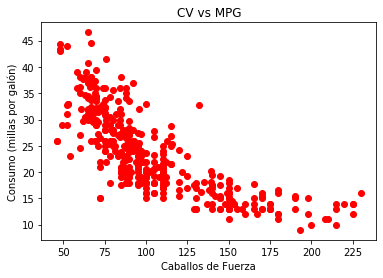

In [99]:
%matplotlib inline
data_auto["mpg"] = data_auto["mpg"].dropna()
data_auto["horsepower"] = data_auto["horsepower"].dropna()
plt.plot(data_auto["horsepower"], data_auto["mpg"], "ro")
plt.xlabel("Caballos de Fuerza")
plt.ylabel("Consumo (millas por galón)")
plt.title("CV vs MPG")

### Modelo de regresión lineal
* mpg = a+b*horsepower

In [127]:
X = data_auto["horsepower"].fillna(data_auto["horsepower"].mean())
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
X_data = X[:,np.newaxis]

In [128]:
lm = LinearRegression()
lm.fit(X_data,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

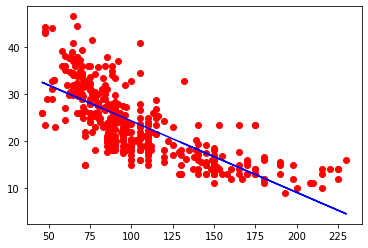

In [129]:
%matplotlib inline
plt.plot(X,Y, "ro")
plt.plot(X, lm.predict(X_data), color="blue")

In [130]:
lm.score(X_data, Y)

0.574653340645025

In [131]:
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE,y_mean, error*100

(10315.75196006092, 5.046879480825511, 23.51457286432162, 21.46277336163346)

### Modelo de regresión cuadrático

* $mpg = a+b*horsepower^2$

In [132]:
X_data = X**2
X_data = X_data[:,np.newaxis]

In [133]:
lm = LinearRegression()
lm.fit(X_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [134]:
lm.score(X_data, Y)

0.4849887034823205

In [135]:
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE,y_mean, error*100

(12490.350340501926, 5.553410772769817, 23.51457286432162, 23.6168898529981)

## Modelo de regresión lineal y cuadrático
* $mpg = a + b*horsepower + c*horsepower^2$

In [137]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [138]:
poly = PolynomialFeatures(degree=2)

In [139]:
X_data = poly.fit_transform(X[:, np.newaxis])

In [140]:
lm = linear_model.LinearRegression()
lm.fit(X_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [141]:
lm.score(X_data, Y)

0.6439066584257469

In [142]:
lm.intercept_

55.02619244708123

In [143]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

$mpg = 55.026 - 0.434*hp + 0.00112615hp^2$

In [166]:
for d in range(2,6):
    poly = PolynomialFeatures(degree=d)
    X_data = poly.fit_transform(X[:, np.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(X_data, Y)
    print("Regresión de grado"+str(d))
    print(lm.score(X_data,Y))
    print(lm.intercept_)
    print(lm.coef_)
    print(regresion_validation(X_data, Y, lm.predict(X_data)))

Regresión de grado2
0.6439066584257469
55.02619244708123
[ 0.         -0.43404318  0.00112615]
SSD: 8636.180643524502, RSE: 4.61778115803654, Y_mean: 23.51457286432162, Error: 19.63795466190689%
Regresión de grado3
0.6444678885560742
58.448774111672364
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
SSD: 8622.569367428552, RSE: 4.614140736300908, Y_mean: 23.51457286432162, Error: 19.622473106036676%
Regresión de grado4
0.6467674189704503
40.09664386273736
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08]
SSD: 8566.79983249135, RSE: 4.599194731579757, Y_mean: 23.51457286432162, Error: 19.558912501268775%
Regresión de grado5
0.6547512491826557
-40.69399204497033
[ 0.00000000e+00  4.00021890e+00 -7.54802463e-02  6.19621638e-04
 -2.36220983e-06  3.41983064e-09]
SSD: 8373.171387671198, RSE: 4.546921733822689, Y_mean: 23.51457286432162, Error: 19.336612066305822%


In [163]:
def regresion_validation (X_data, Y, Y_pred):
    SSD = np.sum((Y - Y_pred)**2)
    RSE = np.sqrt(SSD/(len(X_data)-1))
    y_mean = np.mean(Y)
    error = RSE/y_mean
    return "SSD: "+str(SSD)+", RSE: "+str(RSE)+", Y_mean: "+str(y_mean)+", Error: "+str(error*100)+"%"

## El problema de los outliers